<a href="https://colab.research.google.com/github/SushmaRajagopal/Antimicrobial-peptide-prediction/blob/main/final_code_amp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving AMPlify_AMP_test_common_organized_data.csv to AMPlify_AMP_test_common_organized_data.csv
Saving AMPlify_non_AMP_test_balanced_organized_data.csv to AMPlify_non_AMP_test_balanced_organized_data.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load antimicrobial peptide dataset
amp_df = pd.read_csv("AMPlify_AMP_test_common_organized_data.csv")
amp_df["Label"] = 1  # Assign label 1 for antimicrobial peptides

# Load non-antimicrobial peptide dataset
non_amp_df = pd.read_csv("AMPlify_non_AMP_test_balanced_organized_data.csv")
non_amp_df["Label"] = 0  # Assign label 0 for non-antimicrobial peptides

# Combine datasets
combined_df = pd.concat([amp_df, non_amp_df], ignore_index=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_df["Bio-sequence"], combined_df["Label"], test_size=0.2, random_state=42)

# Vectorize sequences using TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(analyzer="char", ngram_range=(1, 3))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_accuracy = accuracy_score(y_test, nb_classifier.predict(X_test_tfidf))
print("Naive Bayes Classifier Accuracy:", nb_accuracy)

# Train Logistic Regression Classifier
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)
lr_accuracy = accuracy_score(y_test, lr_classifier.predict(X_test_tfidf))
print("Logistic Regression Accuracy:", lr_accuracy)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)
rf_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test_tfidf))
print("Random Forest Classifier Accuracy:", rf_accuracy)

# Preprocess sequences for deep learning models
max_len = max(combined_df["Bio-sequence"].apply(len))
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(combined_df["Bio-sequence"])
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

# Define LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_len))
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(LSTM(32))
lstm_model.add(Dense(1, activation="sigmoid"))
lstm_model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

# Define GRU Model
gru_model = Sequential()
gru_model.add(Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_len))
gru_model.add(GRU(64, return_sequences=True))
gru_model.add(GRU(32))
gru_model.add(Dense(1, activation="sigmoid"))
gru_model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

# Train LSTM Model
lstm_model.fit(X_train_seq, y_train, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test), callbacks=[EarlyStopping(patience=3)])
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_seq, y_test)
print("LSTM Model Accuracy:", lstm_accuracy)

# Train GRU Model
gru_model.fit(X_train_seq, y_train, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test), callbacks=[EarlyStopping(patience=3)])
gru_loss, gru_accuracy = gru_model.evaluate(X_test_seq, y_test)
print("GRU Model Accuracy:", gru_accuracy)


Naive Bayes Classifier Accuracy: 0.8652694610778443
Logistic Regression Accuracy: 0.8473053892215568
Random Forest Classifier Accuracy: 0.8383233532934131
Epoch 1/10
42/42 [==============================] - 7s 37ms/step - loss: 0.6312 - accuracy: 0.6632 - val_loss: 0.5338 - val_accuracy: 0.7575
Epoch 2/10
42/42 [==============================] - 1s 15ms/step - loss: 0.4961 - accuracy: 0.7784 - val_loss: 0.4796 - val_accuracy: 0.7994
Epoch 3/10
42/42 [==============================] - 1s 15ms/step - loss: 0.4713 - accuracy: 0.8024 - val_loss: 0.4585 - val_accuracy: 0.7994
Epoch 4/10
42/42 [==============================] - 1s 16ms/step - loss: 0.4616 - accuracy: 0.7927 - val_loss: 0.4446 - val_accuracy: 0.8054
Epoch 5/10
42/42 [==============================] - 1s 16ms/step - loss: 0.4543 - accuracy: 0.7949 - val_loss: 0.4833 - val_accuracy: 0.7695
Epoch 6/10
42/42 [==============================] - 1s 16ms/step - loss: 0.4260 - accuracy: 0.8069 - val_loss: 0.4393 - val_accuracy: 0.7994

In [ ]:
!pip install transformers
!pip install tensorflow

In [ ]:
import csv

input_file = "AMPlify_AMP_test_common_organized_data.csv"
output_file = "AMPlify_AMP_test_common_organized_data.csv"

with open(input_file, "r") as f_in, open(output_file, "w", newline="") as f_out:
    reader = csv.reader(f_in)
    writer = csv.writer(f_out)
    for row in reader:
        data = row[0].split("\t")
        writer.writerow(data)


In [ ]:
import csv

input_file = "AMPlify_non_AMP_test_balanced_organized_data.csv"
output_file = "AMPlify_non_AMP_test_balanced_organized_data.csv"

with open(input_file, "r") as f_in, open(output_file, "w", newline="") as f_out:
    reader = csv.reader(f_in)
    writer = csv.writer(f_out)
    for row in reader:
        data = row[0].split("\t")
        writer.writerow(data)

In [ ]:
import io
posDF = pd.read_csv(io.BytesIO(uploaded['AMPlify_AMP_test_common_organized_data.csv']))
allDataDF = pd.read_csv(io.BytesIO(uploaded['AMPlify_non_AMP_test_balanced_organized_data.csv']))

In [ ]:
allDataDF = allDataDF.set_index(allDataDF['ID'])
print("Dataframe with all peptides:")
display(allDataDF)
posDF = posDF.set_index(posDF['Bio-sequence'])
print("\n\nDataframe with only Antimicrobial peptides:")
display(posDF)

Dataframe with all peptides:


,ID,Bio-sequence
ID,,
>teNEGATIVE0001,>teNEGATIVE0001,ADDKCEDSLRREIACTKCRDRVRTDDYFYECCTSESTFKKCQTMLHQ
>teNEGATIVE0002,>teNEGATIVE0002,MDIITLGWVGVLSVFTLSIAFVVWGRHGM
>teNEGATIVE0003,>teNEGATIVE0003,IVGGVEAVPGVWPYQAALFIIDMYFCGGSLI
>teNEGATIVE0004,>teNEGATIVE0004,AVKCIGWQETCNGKLPCCDGCVMCECNIMGQNCRCNHPKATSECES
>teNEGATIVE0005,>teNEGATIVE0005,MSDINATRLPIWGIGCDPCIGDDVTILLTRGE
...,...,...
>teNEGATIVE0831,>teNEGATIVE0831,MSQSLFNLKSLSRSINNTIRMRRYIVITKASQRAYTIGSSQEKPSW...
>teNEGATIVE0832,>teNEGATIVE0832,AEPNVTVTGAAGQIGYALLFRI
>teNEGATIVE0833,>teNEGATIVE0833,IVGGNEVTPHAYPWQVGLFIDDMYFCGGSISVTLTGWGKP




Dataframe with only Antimicrobial peptides:


,ID,Bio-sequence
Bio-sequence,,
QLPICGETCVLGGCYTPNCRCQYPICVR,>teAMP0001,QLPICGETCVLGGCYTPNCRCQYPICVR
MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEETRGVLKVFLENVIRDAVTYTEHAKRKTVTAMDVVYALKRQGRTLYGFGG,>teAMP0002,MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKR...
GLWSTIKNVGKEAAIAAGKAVLGSL,>teAMP0003,GLWSTIKNVGKEAAIAAGKAVLGSL
APFCIGYLSPKLKDMEPKPRG,>teAMP0004,APFCIGYLSPKLKDMEPKPRG
SLRGCWTKSFPPQPCLGKR,>teAMP0005,SLRGCWTKSFPPQPCLGKR
...,...,...
ALLDKLKSLGKVVGKVALGVVQNYLNPRQ,>teAMP0831,ALLDKLKSLGKVVGKVALGVVQNYLNPRQ
KKCGFFCKLKNKLKSTGSRSNIAAGTHGGTFRV,>teAMP0832,KKCGFFCKLKNKLKSTGSRSNIAAGTHGGTFRV
DIGTKILGGVKTALKGALKELASTYVN,>teAMP0833,DIGTKILGGVKTALKGALKELASTYVN


In [ ]:
# Filter the index values to only include those present in allDataDF
posID_List_filtered = [idx for idx in posDF.index.tolist() if idx in allDataDF.index]

# Drop the filtered index values from allDataDF
negDF = allDataDF.drop(posID_List_filtered)
negDF


,ID,Bio-sequence
ID,,
>teNEGATIVE0001,>teNEGATIVE0001,ADDKCEDSLRREIACTKCRDRVRTDDYFYECCTSESTFKKCQTMLHQ
>teNEGATIVE0002,>teNEGATIVE0002,MDIITLGWVGVLSVFTLSIAFVVWGRHGM
>teNEGATIVE0003,>teNEGATIVE0003,IVGGVEAVPGVWPYQAALFIIDMYFCGGSLI
>teNEGATIVE0004,>teNEGATIVE0004,AVKCIGWQETCNGKLPCCDGCVMCECNIMGQNCRCNHPKATSECES
>teNEGATIVE0005,>teNEGATIVE0005,MSDINATRLPIWGIGCDPCIGDDVTILLTRGE
...,...,...
>teNEGATIVE0831,>teNEGATIVE0831,MSQSLFNLKSLSRSINNTIRMRRYIVITKASQRAYTIGSSQEKPSW...
>teNEGATIVE0832,>teNEGATIVE0832,AEPNVTVTGAAGQIGYALLFRI
>teNEGATIVE0833,>teNEGATIVE0833,IVGGNEVTPHAYPWQVGLFIDDMYFCGGSISVTLTGWGKP


In [ ]:
SeqList = negDF['Bio-sequence'].tolist() + posDF['Bio-sequence'].tolist()
res = sum(map(len, SeqList))/float(len(SeqList))
print("The Mean length of a sequence is: ", res)

SeqList.sort(key = len)
print("The Mode length of a sequence is: ", len(SeqList[int(len(SeqList)/2)]))

The Mean length of a sequence is:  29.13053892215569
The Mode length of a sequence is:  25


The Mean length of a sequence is:  29.13053892215569
The Mode length of a sequence is:  20


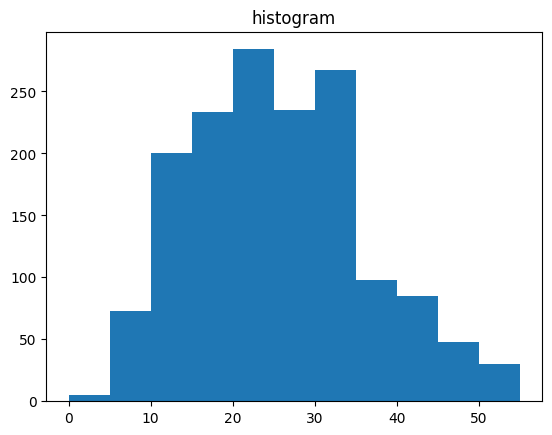

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
SeqList = negDF['Bio-sequence'].tolist() + posDF['Bio-sequence'].tolist()

lengths = [0]*len(SeqList)
for i in range(len(SeqList)):
  lengths[i] = len(SeqList[i])

res = np.mean(np.asarray(lengths))
print("The Mean length of a sequence is: ", res)

res = stats.mode(np.asarray(lengths))
print("The Mode length of a sequence is: ", res[0])

plt.hist(lengths, bins = range(0,60,5))
plt.title("histogram")
plt.show()

In [ ]:
negDF['Bio-sequence'] = (negDF['Bio-sequence'].str.upper())
print("Negative DF")
display(negDF.head(3))

posDF['Bio-sequence'] = (posDF['Bio-sequence'].str.upper())
print("\n\nPositive DF")
display(posDF.head(3))

Negative DF


,ID,Bio-sequence
ID,,
>teNEGATIVE0001,>teNEGATIVE0001,ADDKCEDSLRREIACTKCRDRVRTDDYFYECCTSESTFKKCQTMLHQ
>teNEGATIVE0002,>teNEGATIVE0002,MDIITLGWVGVLSVFTLSIAFVVWGRHGM
>teNEGATIVE0003,>teNEGATIVE0003,IVGGVEAVPGVWPYQAALFIIDMYFCGGSLI




Positive DF


,ID,Bio-sequence
Bio-sequence,,
QLPICGETCVLGGCYTPNCRCQYPICVR,>teAMP0001,QLPICGETCVLGGCYTPNCRCQYPICVR
MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEETRGVLKVFLENVIRDAVTYTEHAKRKTVTAMDVVYALKRQGRTLYGFGG,>teAMP0002,MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKR...
GLWSTIKNVGKEAAIAAGKAVLGSL,>teAMP0003,GLWSTIKNVGKEAAIAAGKAVLGSL


In [ ]:
negDF['TruncSequence'] = (negDF['Bio-sequence'].str.slice(0,22))
print("Negative DF")
display(negDF.head(3))

posDF['TruncSequence'] = (posDF['Bio-sequence'].str.slice(0,22))
print("\n\nPositive DF")
display(posDF.head(3))

Negative DF


,ID,Bio-sequence,TruncSequence
ID,,,
>teNEGATIVE0001,>teNEGATIVE0001,ADDKCEDSLRREIACTKCRDRVRTDDYFYECCTSESTFKKCQTMLHQ,ADDKCEDSLRREIACTKCRDRV
>teNEGATIVE0002,>teNEGATIVE0002,MDIITLGWVGVLSVFTLSIAFVVWGRHGM,MDIITLGWVGVLSVFTLSIAFV
>teNEGATIVE0003,>teNEGATIVE0003,IVGGVEAVPGVWPYQAALFIIDMYFCGGSLI,IVGGVEAVPGVWPYQAALFIID




Positive DF


,ID,Bio-sequence,TruncSequence
Bio-sequence,,,
QLPICGETCVLGGCYTPNCRCQYPICVR,>teAMP0001,QLPICGETCVLGGCYTPNCRCQYPICVR,QLPICGETCVLGGCYTPNCRCQ
MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEETRGVLKVFLENVIRDAVTYTEHAKRKTVTAMDVVYALKRQGRTLYGFGG,>teAMP0002,MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKR...,MSGRGKGGKGLGKGGAKRHRKV
GLWSTIKNVGKEAAIAAGKAVLGSL,>teAMP0003,GLWSTIKNVGKEAAIAAGKAVLGSL,GLWSTIKNVGKEAAIAAGKAVL


In [ ]:
negDF['ModSequence'] = (negDF['TruncSequence'].str.pad(22,"right","#"))
print("Negative DF")
display(negDF.head(3))

posDF['ModSequence'] = (posDF['TruncSequence'].str.pad(22,"right","#"))
print("\n\nPositive DF")
display(posDF.head(3))

Negative DF


,ID,Bio-sequence,TruncSequence,ModSequence
ID,,,,
>teNEGATIVE0001,>teNEGATIVE0001,ADDKCEDSLRREIACTKCRDRVRTDDYFYECCTSESTFKKCQTMLHQ,ADDKCEDSLRREIACTKCRDRV,ADDKCEDSLRREIACTKCRDRV
>teNEGATIVE0002,>teNEGATIVE0002,MDIITLGWVGVLSVFTLSIAFVVWGRHGM,MDIITLGWVGVLSVFTLSIAFV,MDIITLGWVGVLSVFTLSIAFV
>teNEGATIVE0003,>teNEGATIVE0003,IVGGVEAVPGVWPYQAALFIIDMYFCGGSLI,IVGGVEAVPGVWPYQAALFIID,IVGGVEAVPGVWPYQAALFIID




Positive DF


,ID,Bio-sequence,TruncSequence,ModSequence
Bio-sequence,,,,
QLPICGETCVLGGCYTPNCRCQYPICVR,>teAMP0001,QLPICGETCVLGGCYTPNCRCQYPICVR,QLPICGETCVLGGCYTPNCRCQ,QLPICGETCVLGGCYTPNCRCQ
MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEETRGVLKVFLENVIRDAVTYTEHAKRKTVTAMDVVYALKRQGRTLYGFGG,>teAMP0002,MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKR...,MSGRGKGGKGLGKGGAKRHRKV,MSGRGKGGKGLGKGGAKRHRKV
GLWSTIKNVGKEAAIAAGKAVLGSL,>teAMP0003,GLWSTIKNVGKEAAIAAGKAVLGSL,GLWSTIKNVGKEAAIAAGKAVL,GLWSTIKNVGKEAAIAAGKAVL


In [ ]:
negDF['Value'] = 0
print("The negative sequences, with preprocessed sequence strings and value columns appended:")
display(negDF.head(3))

posDF['Value'] = 1
print("\n\nThe positive sequences, with preprocessed sequence strings and value columns appended:")
display(posDF.head(3))

The negative sequences, with preprocessed sequence strings and value columns appended:


,ID,Bio-sequence,TruncSequence,ModSequence,Value
ID,,,,,
>teNEGATIVE0001,>teNEGATIVE0001,ADDKCEDSLRREIACTKCRDRVRTDDYFYECCTSESTFKKCQTMLHQ,ADDKCEDSLRREIACTKCRDRV,ADDKCEDSLRREIACTKCRDRV,0
>teNEGATIVE0002,>teNEGATIVE0002,MDIITLGWVGVLSVFTLSIAFVVWGRHGM,MDIITLGWVGVLSVFTLSIAFV,MDIITLGWVGVLSVFTLSIAFV,0
>teNEGATIVE0003,>teNEGATIVE0003,IVGGVEAVPGVWPYQAALFIIDMYFCGGSLI,IVGGVEAVPGVWPYQAALFIID,IVGGVEAVPGVWPYQAALFIID,0




The positive sequences, with preprocessed sequence strings and value columns appended:


,ID,Bio-sequence,TruncSequence,ModSequence,Value
Bio-sequence,,,,,
QLPICGETCVLGGCYTPNCRCQYPICVR,>teAMP0001,QLPICGETCVLGGCYTPNCRCQYPICVR,QLPICGETCVLGGCYTPNCRCQ,QLPICGETCVLGGCYTPNCRCQ,1
MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEETRGVLKVFLENVIRDAVTYTEHAKRKTVTAMDVVYALKRQGRTLYGFGG,>teAMP0002,MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKR...,MSGRGKGGKGLGKGGAKRHRKV,MSGRGKGGKGLGKGGAKRHRKV,1
GLWSTIKNVGKEAAIAAGKAVLGSL,>teAMP0003,GLWSTIKNVGKEAAIAAGKAVLGSL,GLWSTIKNVGKEAAIAAGKAVL,GLWSTIKNVGKEAAIAAGKAVL,1


In [ ]:
# allDataDF = posDF.append(negDF)
# inputData = allDataDF[['ModSequence', 'Value']]
# inputData

import pandas as pd

allDataDF = pd.concat([posDF, negDF])
inputData = allDataDF[['ModSequence', 'Value']]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
# One hot encoding of the alphabets used to represent the amino acids
import numpy
import operator
from functools import reduce
from numpy import argmax
SeqEncoded = []
for j in range(len(allDataDF)):
  data = allDataDF.ModSequence[j]
  # define universe of possible input values
  alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ#/ '
  # define a mapping of chars to integers
  char_to_int = dict((c, i) for i, c in enumerate(alphabet))
  int_to_char = dict((i, c) for i, c in enumerate(alphabet))
  # integer encode input data
  integer_encoded = [char_to_int[char] for char in data]
  #print(integer_encoded)
  # one hot encode
  onehot_encoded = list()
  for value in integer_encoded:
    letter = [0 for _ in range(len(alphabet))]
    letter[value] = 1
    onehot_encoded.append(letter)
  #print(onehot_encoded)
  SeqEncoded.append(onehot_encoded)
# End of the loop
print(len(SeqEncoded))
allDataDF['EncodedX'] = SeqEncoded

1670


In [ ]:
# Flattening the list
flatten = lambda l: [item for sublist in l for item in sublist]
for i in range(len(allDataDF)):
  allDataDF.EncodedX[i] = flatten(allDataDF.EncodedX[i])
print((allDataDF.EncodedX[3]))

Streaming output truncated to the last 5000 lines.
<ipython-input-16-7c546840cc71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allDataDF.EncodedX[i] = flatten(allDataDF.EncodedX[i])
<ipython-input-16-7c546840cc71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allDataDF.EncodedX[i] = flatten(allDataDF.EncodedX[i])
<ipython-input-16-7c546840cc71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allDataDF.EncodedX[i] = flatten(all

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

<ipython-input-16-7c546840cc71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allDataDF.EncodedX[i] = flatten(allDataDF.EncodedX[i])
<ipython-input-16-7c546840cc71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allDataDF.EncodedX[i] = flatten(allDataDF.EncodedX[i])
<ipython-input-16-7c546840cc71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allDataDF.EncodedX[i] = flatten(allDataDF.EncodedX[i])
<ipython-input-16-7c546840cc71>

In [ ]:
#Splitting the dataset into train and test
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, HashingVectorizer
from sklearn.model_selection import train_test_split as tts
tY, vY, tarr, varr = tts(allDataDF.Value, allDataDF.EncodedX, test_size=.2, random_state=00)
print(f'Train text:{len(tY)}. Test text: {len(vY)}')
print(tarr)

Train text:1336. Test text: 334
>teNEGATIVE0667                 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
GFLNTAMNTVTNLAGTLMDKAKCKIRGC    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
GSKILHSAGKFGKAFLGEINKS          [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
FIKELLPHLSGIIDSVANAIKG          [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
>teNEGATIVE0404                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
                                                      ...                        
>teNEGATIVE0001                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
>teNEGATIVE0382                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
>teNEGATIVE0819                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
FFWHHIGHALDAAKRVHGMLSG          [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
FLPIVTGLLSSLL                   [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: EncodedX, Length: 1336, dtype: object


In [ ]:
tarr.shape

(1336,)

In [ ]:
varr.shape

(334,)

In [ ]:
X_train = np.array([np.array(i) for i in tarr])
X_test = np.array([np.array(i) for i in varr])

In [ ]:
print(X_train.shape, X_test.shape)

(1336, 638) (334, 638)


In [ ]:
y_train = np.array(tY)
y_test = np.array(vY)

In [ ]:
import torch
import pandas as pd
from sklearn.metrics import accuracy_score
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, RobertaTokenizer, RobertaForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from tqdm import tqdm

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(allDataDF['ModSequence'], allDataDF['Value'], test_size=0.2, random_state=42)

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Load DistilBERT tokenizer and model
distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
distilbert_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased').to(device)

# Load RoBERTa tokenizer and model
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
roberta_model = RobertaForSequenceClassification.from_pretrained('roberta-base').to(device)

# Tokenize data
train_encodings_distilbert = distilbert_tokenizer(list(X_train), truncation=True, padding=True, max_length=22, return_tensors='pt')
test_encodings_distilbert = distilbert_tokenizer(list(X_test), truncation=True, padding=True, max_length=22, return_tensors='pt')

train_encodings_roberta = roberta_tokenizer(list(X_train), truncation=True, padding=True, max_length=22, return_tensors='pt')
test_encodings_roberta = roberta_tokenizer(list(X_test), truncation=True, padding=True, max_length=22, return_tensors='pt')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

# Prepare DataLoader
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset_distilbert = MyDataset(train_encodings_distilbert, y_train)
train_loader_distilbert = DataLoader(train_dataset_distilbert, batch_size=16, shuffle=True)

train_dataset_roberta = MyDataset(train_encodings_roberta, y_train)
train_loader_roberta = DataLoader(train_dataset_roberta, batch_size=16, shuffle=True)

In [ ]:
# Define optimizer and loss function
optimizer_distilbert = torch.optim.AdamW(distilbert_model.parameters(), lr=2e-5)
optimizer_roberta = torch.optim.AdamW(roberta_model.parameters(), lr=2e-5)

loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
# Training loop for DistilBERT
epochs = 10
best_accuracy_distilbert = 0
for epoch in range(epochs):
    distilbert_model.train()
    train_losses = []
    for batch in tqdm(train_loader_distilbert, desc=f"Epoch {epoch + 1} - DistilBERT"):
        optimizer_distilbert.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = distilbert_model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        train_losses.append(loss.item())
        loss.backward()
        optimizer_distilbert.step()
    print(f"Epoch {epoch + 1} average train loss - DistilBERT: {sum(train_losses) / len(train_losses)}")

    # Evaluate on test set
    distilbert_model.eval()
    with torch.no_grad():
        y_true = []
        y_pred = []
        for i in tqdm(range(len(X_test)), desc="Testing - DistilBERT"):
            input_ids = test_encodings_distilbert['input_ids'][i].unsqueeze(0).to(device)
            attention_mask = test_encodings_distilbert['attention_mask'][i].unsqueeze(0).to(device)
            label = torch.tensor([y_test[i]]).to(device)
            output = distilbert_model(input_ids=input_ids, attention_mask=attention_mask)
            prediction = torch.argmax(output.logits).item()
            y_true.append(y_test[i])
            y_pred.append(prediction)
        accuracy_distilbert = accuracy_score(y_true, y_pred)
        print(f"Accuracy - DistilBERT: {accuracy_distilbert}")
        if accuracy_distilbert >= 0.95:
            print("Desired accuracy achieved for DistilBERT!")
            break
        if accuracy_distilbert > best_accuracy_distilbert:
            best_accuracy_distilbert = accuracy_distilbert
            # Save the best DistilBERT model
            torch.save(distilbert_model.state_dict(), 'best_distilbert_model.pth')

Epoch 1 - DistilBERT:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 1 - DistilBERT: 100%|██████████| 84/84 [00:05<00:00, 14.90it/s]


Epoch 1 average train loss - DistilBERT: 0.6678794640160742


Testing - DistilBERT: 100%|██████████| 334/334 [00:01<00:00, 175.28it/s]


Accuracy - DistilBERT: 0.7005988023952096


Epoch 2 - DistilBERT:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 2 - DistilBERT: 100%|██████████| 84/84 [00:03<00:00, 21.12it/s]


Epoch 2 average train loss - DistilBERT: 0.4573031359662612


Testing - DistilBERT: 100%|██████████| 334/334 [00:02<00:00, 140.93it/s]


Accuracy - DistilBERT: 0.7544910179640718


Epoch 3 - DistilBERT:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 3 - DistilBERT: 100%|██████████| 84/84 [00:03<00:00, 21.17it/s]


Epoch 3 average train loss - DistilBERT: 0.30078808528681594


Testing - DistilBERT: 100%|██████████| 334/334 [00:01<00:00, 178.45it/s]


Accuracy - DistilBERT: 0.844311377245509


Epoch 4 - DistilBERT:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 4 - DistilBERT: 100%|██████████| 84/84 [00:04<00:00, 20.80it/s]


Epoch 4 average train loss - DistilBERT: 0.17831959180711282


Testing - DistilBERT: 100%|██████████| 334/334 [00:01<00:00, 168.55it/s]


Accuracy - DistilBERT: 0.8263473053892215


Epoch 5 - DistilBERT:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 5 - DistilBERT: 100%|██████████| 84/84 [00:03<00:00, 21.23it/s]


Epoch 5 average train loss - DistilBERT: 0.12139064556963387


Testing - DistilBERT: 100%|██████████| 334/334 [00:01<00:00, 180.47it/s]


Accuracy - DistilBERT: 0.8502994011976048


Epoch 6 - DistilBERT:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 6 - DistilBERT: 100%|██████████| 84/84 [00:04<00:00, 20.78it/s]


Epoch 6 average train loss - DistilBERT: 0.06202169634690065


Testing - DistilBERT: 100%|██████████| 334/334 [00:01<00:00, 180.39it/s]


Accuracy - DistilBERT: 0.8682634730538922


Epoch 7 - DistilBERT:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 7 - DistilBERT: 100%|██████████| 84/84 [00:03<00:00, 21.02it/s]


Epoch 7 average train loss - DistilBERT: 0.05324974092322269


Testing - DistilBERT: 100%|██████████| 334/334 [00:01<00:00, 181.76it/s]


Accuracy - DistilBERT: 0.8562874251497006


Epoch 8 - DistilBERT:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 8 - DistilBERT: 100%|██████████| 84/84 [00:05<00:00, 15.43it/s]


Epoch 8 average train loss - DistilBERT: 0.044290503625580596


Testing - DistilBERT: 100%|██████████| 334/334 [00:01<00:00, 178.00it/s]


Accuracy - DistilBERT: 0.8502994011976048


Epoch 9 - DistilBERT:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 9 - DistilBERT: 100%|██████████| 84/84 [00:03<00:00, 21.06it/s]


Epoch 9 average train loss - DistilBERT: 0.022142047780410696


Testing - DistilBERT: 100%|██████████| 334/334 [00:01<00:00, 178.12it/s]


Accuracy - DistilBERT: 0.8473053892215568


Epoch 10 - DistilBERT:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 10 - DistilBERT: 100%|██████████| 84/84 [00:04<00:00, 20.72it/s]


Epoch 10 average train loss - DistilBERT: 0.02864444440153117


Testing - DistilBERT: 100%|██████████| 334/334 [00:01<00:00, 179.23it/s]

Accuracy - DistilBERT: 0.8562874251497006


In [ ]:
# Training loop for RoBERTa
epochs = 10
best_accuracy_roberta = 0
for epoch in range(epochs):
    roberta_model.train()
    train_losses = []
    for batch in tqdm(train_loader_roberta, desc=f"Epoch {epoch + 1} - RoBERTa"):
        optimizer_roberta.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = roberta_model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        train_losses.append(loss.item())
        loss.backward()
        optimizer_roberta.step()
    print(f"Epoch {epoch + 1} average train loss - RoBERTa: {sum(train_losses) / len(train_losses)}")

    # Evaluate on test set
    roberta_model.eval()
    with torch.no_grad():
        y_true = []
        y_pred = []
        for i in tqdm(range(len(X_test)), desc="Testing - RoBERTa"):
            input_ids = test_encodings_roberta['input_ids'][i].unsqueeze(0).to(device)
            attention_mask = test_encodings_roberta['attention_mask'][i].unsqueeze(0).to(device)
            label = torch.tensor([y_test[i]]).to(device)
            output = roberta_model(input_ids=input_ids, attention_mask=attention_mask)
            prediction = torch.argmax(output.logits).item()
            y_true.append(y_test[i])
            y_pred.append(prediction)
        accuracy_roberta = accuracy_score(y_true, y_pred)
        print(f"Accuracy - RoBERTa: {accuracy_roberta}")
        if accuracy_roberta >= 0.95:
            print("Desired accuracy achieved for RoBERTa!")
            break
        if accuracy_roberta > best_accuracy_roberta:
            best_accuracy_roberta = accuracy_roberta
            # Save the best RoBERTa model
            torch.save(roberta_model.state_dict(), 'best_roberta_model.pth')

Epoch 1 - RoBERTa:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 1 - RoBERTa: 100%|██████████| 84/84 [00:07<00:00, 11.26it/s]


Epoch 1 average train loss - RoBERTa: 0.6701894821155638


Testing - RoBERTa: 100%|██████████| 334/334 [00:03<00:00, 97.68it/s]


Accuracy - RoBERTa: 0.6736526946107785


Epoch 2 - RoBERTa:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 2 - RoBERTa: 100%|██████████| 84/84 [00:07<00:00, 11.32it/s]


Epoch 2 average train loss - RoBERTa: 0.4526202653845151


Testing - RoBERTa: 100%|██████████| 334/334 [00:03<00:00, 92.25it/s]


Accuracy - RoBERTa: 0.8293413173652695


Epoch 3 - RoBERTa:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 3 - RoBERTa: 100%|██████████| 84/84 [00:07<00:00, 11.28it/s]


Epoch 3 average train loss - RoBERTa: 0.35372605361044407


Testing - RoBERTa: 100%|██████████| 334/334 [00:03<00:00, 97.77it/s]


Accuracy - RoBERTa: 0.8562874251497006


Epoch 4 - RoBERTa:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 4 - RoBERTa: 100%|██████████| 84/84 [00:07<00:00, 11.26it/s]


Epoch 4 average train loss - RoBERTa: 0.2544329924109791


Testing - RoBERTa: 100%|██████████| 334/334 [00:03<00:00, 96.85it/s]


Accuracy - RoBERTa: 0.8652694610778443


Epoch 5 - RoBERTa:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 5 - RoBERTa: 100%|██████████| 84/84 [00:07<00:00, 11.19it/s]


Epoch 5 average train loss - RoBERTa: 0.1888234537715713


Testing - RoBERTa: 100%|██████████| 334/334 [00:03<00:00, 98.14it/s] 


Accuracy - RoBERTa: 0.8682634730538922


Epoch 6 - RoBERTa:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 6 - RoBERTa: 100%|██████████| 84/84 [00:07<00:00, 11.21it/s]


Epoch 6 average train loss - RoBERTa: 0.15011884484972274


Testing - RoBERTa: 100%|██████████| 334/334 [00:03<00:00, 98.09it/s]


Accuracy - RoBERTa: 0.8502994011976048


Epoch 7 - RoBERTa:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 7 - RoBERTa: 100%|██████████| 84/84 [00:07<00:00, 11.25it/s]


Epoch 7 average train loss - RoBERTa: 0.09415638556848058


Testing - RoBERTa: 100%|██████████| 334/334 [00:03<00:00, 97.26it/s]


Accuracy - RoBERTa: 0.8712574850299402


Epoch 8 - RoBERTa:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 8 - RoBERTa: 100%|██████████| 84/84 [00:07<00:00, 11.19it/s]


Epoch 8 average train loss - RoBERTa: 0.09835949589476167


Testing - RoBERTa: 100%|██████████| 334/334 [00:03<00:00, 97.41it/s]


Accuracy - RoBERTa: 0.844311377245509


Epoch 9 - RoBERTa:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 9 - RoBERTa: 100%|██████████| 84/84 [00:07<00:00, 11.22it/s]


Epoch 9 average train loss - RoBERTa: 0.07043533798839365


Testing - RoBERTa: 100%|██████████| 334/334 [00:03<00:00, 97.88it/s]


Accuracy - RoBERTa: 0.874251497005988


Epoch 10 - RoBERTa:   0%|          | 0/84 [00:00<?, ?it/s]<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 10 - RoBERTa: 100%|██████████| 84/84 [00:07<00:00, 11.08it/s]


Epoch 10 average train loss - RoBERTa: 0.07150707733983706


Testing - RoBERTa: 100%|██████████| 334/334 [00:03<00:00, 97.48it/s]

Accuracy - RoBERTa: 0.8592814371257484


In [ ]:
# Load the best models
best_distilbert_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased').to(device)
best_distilbert_model.load_state_dict(torch.load('best_distilbert_model.pth'))

best_roberta_model = RobertaForSequenceClassification.from_pretrained('roberta-base').to(device)
best_roberta_model.load_state_dict(torch.load('best_roberta_model.pth'))

# Evaluate the best models
best_distilbert_model.eval()
best_roberta_model.eval()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [ ]:
# Evaluate DistilBERT
with torch.no_grad():
    y_true_distilbert = []
    y_pred_distilbert = []
    for i in tqdm(range(len(X_test)), desc="Testing - Best DistilBERT"):
        input_ids = test_encodings_distilbert['input_ids'][i].unsqueeze(0).to(device)
        attention_mask = test_encodings_distilbert['attention_mask'][i].unsqueeze(0).to(device)
        label = torch.tensor([y_test[i]]).to(device)
        output = best_distilbert_model(input_ids=input_ids, attention_mask=attention_mask)
        prediction = torch.argmax(output.logits).item()
        y_true_distilbert.append(y_test[i])
        y_pred_distilbert.append(prediction)
    accuracy_distilbert = accuracy_score(y_true_distilbert, y_pred_distilbert)
    print(f"Accuracy - Best DistilBERT: {accuracy_distilbert}")

# Evaluate RoBERTa
with torch.no_grad():
    y_true_roberta = []
    y_pred_roberta = []
    for i in tqdm(range(len(X_test)), desc="Testing - Best RoBERTa"):
        input_ids = test_encodings_roberta['input_ids'][i].unsqueeze(0).to(device)
        attention_mask = test_encodings_roberta['attention_mask'][i].unsqueeze(0).to(device)
        label = torch.tensor([y_test[i]]).to(device)
        output = best_roberta_model(input_ids=input_ids, attention_mask=attention_mask)
        prediction = torch.argmax(output.logits).item()
        y_true_roberta.append(y_test[i])
        y_pred_roberta.append(prediction)
    accuracy_roberta = accuracy_score(y_true_roberta, y_pred_roberta)
    print(f"Accuracy - Best RoBERTa: {accuracy_roberta}")

Testing - Best DistilBERT: 100%|██████████| 334/334 [00:01<00:00, 178.48it/s]


Accuracy - Best DistilBERT: 0.8682634730538922


Testing - Best RoBERTa: 100%|██████████| 334/334 [00:03<00:00, 83.96it/s]

Accuracy - Best RoBERTa: 0.874251497005988


In [ ]:
# Store the results in a DataFrame
results = pd.DataFrame({
    'Model': ['DistilBERT', 'RoBERTa', 'Best DistilBERT', 'Best RoBERTa'],
    'Accuracy': [accuracy_distilbert, accuracy_roberta, accuracy_distilbert, accuracy_roberta]
})

print(results)

             Model  Accuracy
0       DistilBERT  0.868263
1          RoBERTa  0.874251
2  Best DistilBERT  0.868263
3     Best RoBERTa  0.874251


<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


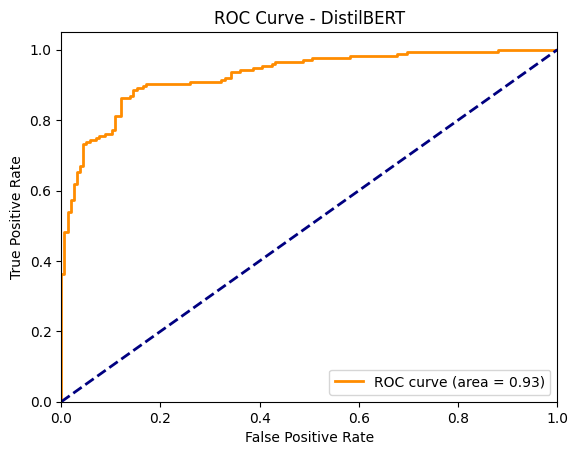

Evaluation Metrics - DistilBERT:
Accuracy: 0.8682634730538922
Precision: 0.8707865168539326
Recall: 0.8806818181818182
F1 Score: 0.8757062146892656
Confusion Matrix:
[[135  23]
 [ 21 155]]
AUC: 0.9285097813578825


<ipython-input-26-d8b54946e954>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


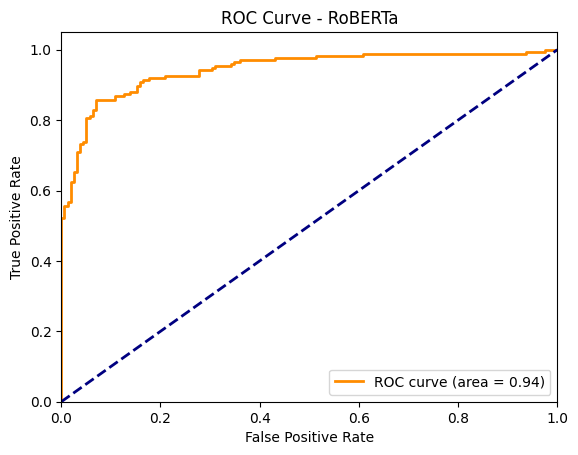

Evaluation Metrics - RoBERTa:
Accuracy: 0.874251497005988
Precision: 0.8641304347826086
Recall: 0.9034090909090909
F1 Score: 0.8833333333333333
Confusion Matrix:
[[133  25]
 [ 17 159]]
AUC: 0.9439729574223246


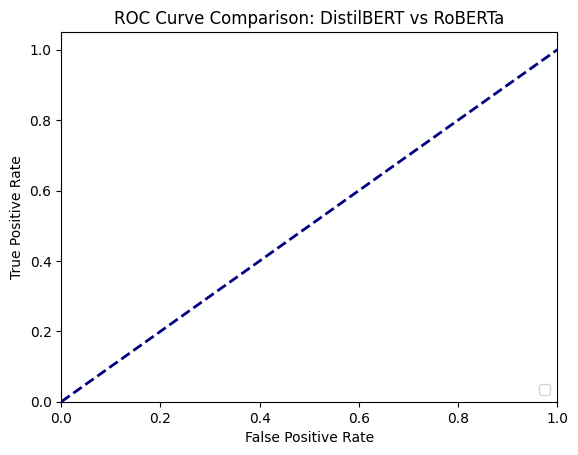

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch.nn.functional as F

def evaluate_model(model, test_loader, model_name):
    y_true = []
    y_pred = []
    y_pred_proba = []

    model.eval()
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

            predictions = torch.argmax(outputs.logits, dim=1).tolist()
            y_true.extend(labels.tolist())
            y_pred.extend(predictions)

            probs = F.softmax(outputs.logits, dim=1)
            y_pred_proba.extend(probs[:, 1].tolist())  # Probability of positive class

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Evaluation Metrics - {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"AUC: {auc}")

# Prepare DataLoader for test data
test_dataset_distilbert = MyDataset(test_encodings_distilbert, y_test)
test_loader_distilbert = DataLoader(test_dataset_distilbert, batch_size=16, shuffle=False)

test_dataset_roberta = MyDataset(test_encodings_roberta, y_test)
test_loader_roberta = DataLoader(test_dataset_roberta, batch_size=16, shuffle=False)

# Evaluate DistilBERT model
evaluate_model(best_distilbert_model, test_loader_distilbert, "DistilBERT")

# Evaluate RoBERTa model
evaluate_model(best_roberta_model, test_loader_roberta, "RoBERTa")

# Plot combined ROC curves
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: DistilBERT vs RoBERTa')
plt.legend(loc="lower right")
plt.show()


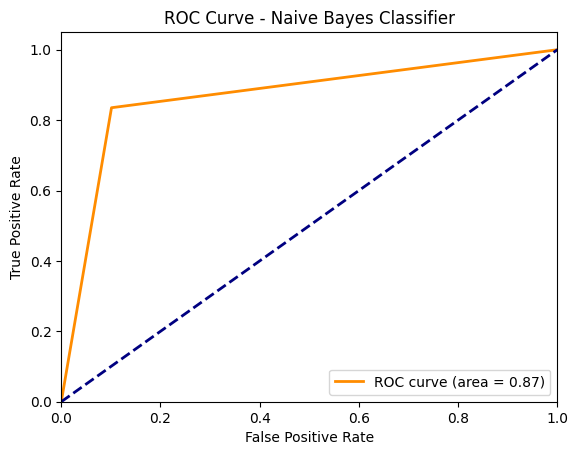

Naive Bayes Classifier:
Accuracy: 0.8652694610778443
Precision: 0.901840490797546
Recall: 0.8352272727272727
F1 Score: 0.8672566371681416
Confusion Matrix:
 [[142  16]
 [ 29 147]]
AUC: 0.8669807249712314


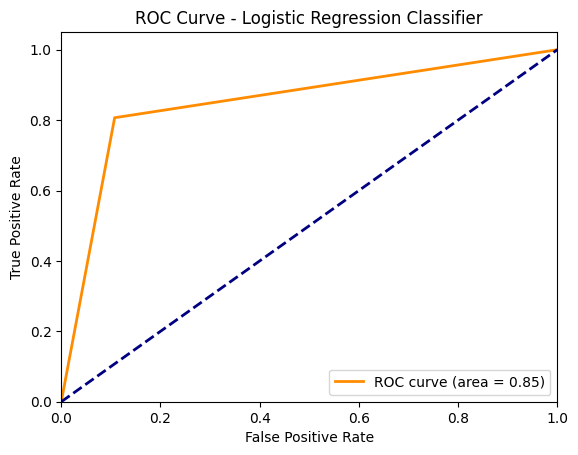


Logistic Regression Classifier:
Accuracy: 0.8473053892215568
Precision: 0.8930817610062893
Recall: 0.8068181818181818
F1 Score: 0.8477611940298507
Confusion Matrix:
 [[141  17]
 [ 34 142]]
AUC: 0.8496116225546604


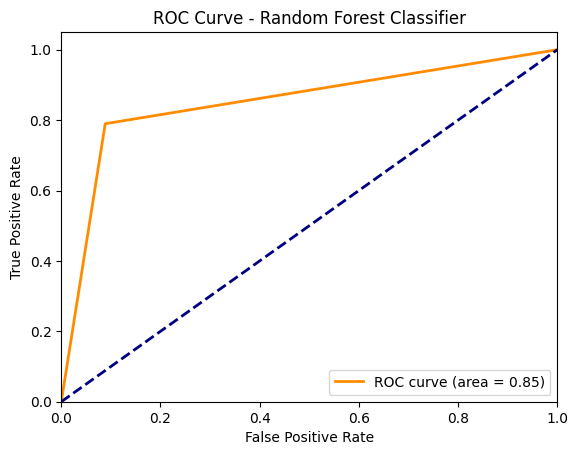


Random Forest Classifier:
Accuracy: 0.8473053892215568
Precision: 0.9084967320261438
Recall: 0.7897727272727273
F1 Score: 0.8449848024316109
Confusion Matrix:
 [[144  14]
 [ 37 139]]
AUC: 0.8505825661680092
Epoch 1/20
21/21 [==============================] - 7s 93ms/step - loss: 0.6919 - accuracy: 0.5726 - val_loss: 0.6905 - val_accuracy: 0.6407
Epoch 2/20
21/21 [==============================] - 1s 28ms/step - loss: 0.6870 - accuracy: 0.6984 - val_loss: 0.6827 - val_accuracy: 0.6796
Epoch 3/20
21/21 [==============================] - 1s 30ms/step - loss: 0.6715 - accuracy: 0.6969 - val_loss: 0.6517 - val_accuracy: 0.6527
Epoch 4/20
21/21 [==============================] - 0s 19ms/step - loss: 0.6307 - accuracy: 0.6707 - val_loss: 0.6110 - val_accuracy: 0.7096
Epoch 5/20
21/21 [==============================] - 1s 28ms/step - loss: 0.5781 - accuracy: 0.7328 - val_loss: 0.5504 - val_accuracy: 0.7695
Epoch 6/20
21/21 [==============================] - 1s 25ms/step - loss: 0.5296 - accur

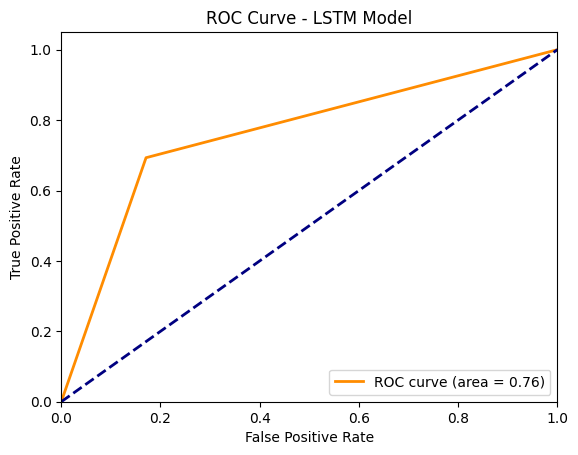


LSTM Model:
Accuracy: 0.7574850299401198
Precision: 0.8187919463087249
Recall: 0.6931818181818182
F1 Score: 0.7507692307692309
Confusion Matrix:
 [[131  27]
 [ 54 122]]
AUC: 0.7611478711162256
Epoch 1/20
21/21 [==============================] - 5s 58ms/step - loss: 0.6922 - accuracy: 0.5561 - val_loss: 0.6914 - val_accuracy: 0.5749
Epoch 2/20
21/21 [==============================] - 0s 24ms/step - loss: 0.6894 - accuracy: 0.6400 - val_loss: 0.6886 - val_accuracy: 0.6138
Epoch 3/20
21/21 [==============================] - 1s 26ms/step - loss: 0.6856 - accuracy: 0.6415 - val_loss: 0.6833 - val_accuracy: 0.6317
Epoch 4/20
21/21 [==============================] - 1s 27ms/step - loss: 0.6782 - accuracy: 0.6549 - val_loss: 0.6725 - val_accuracy: 0.6407
Epoch 5/20
21/21 [==============================] - 1s 26ms/step - loss: 0.6591 - accuracy: 0.6811 - val_loss: 0.6443 - val_accuracy: 0.6766
Epoch 6/20
21/21 [==============================] - 1s 26ms/step - loss: 0.6076 - accuracy: 0.7021 - 

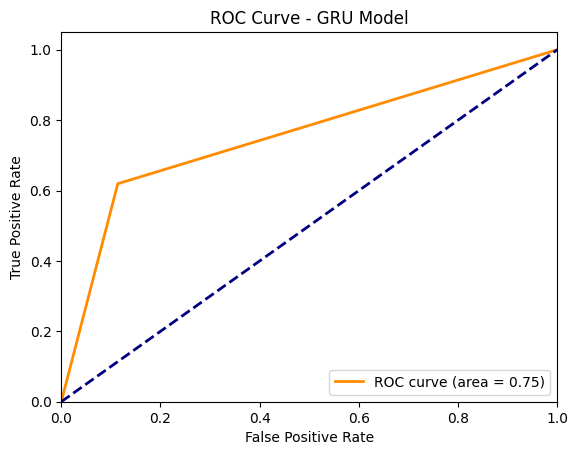


GRU Model:
Accuracy: 0.7455089820359282
Precision: 0.8582677165354331
Recall: 0.6193181818181818
F1 Score: 0.7194719471947194
Confusion Matrix:
 [[140  18]
 [ 67 109]]
AUC: 0.7526970655926353


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load antimicrobial peptide dataset
amp_df = pd.read_csv("/content/1_AMPlify_AMP_test_common_organized_data.csv")
amp_df["Label"] = 1  # Assign label 1 for antimicrobial peptides

# Load non-antimicrobial peptide dataset
non_amp_df = pd.read_csv("/content/2_AMPlify_non_AMP_test_balanced_organized_data.csv")
non_amp_df["Label"] = 0  # Assign label 0 for non-antimicrobial peptides

# Combine datasets
combined_df = pd.concat([amp_df, non_amp_df], ignore_index=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_df["Bio-sequence"], combined_df["Label"], test_size=0.2, random_state=42)

# Vectorize sequences using TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(analyzer="char", ngram_range=(1, 3))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)
nb_confusion = confusion_matrix(y_test, nb_predictions)
nb_roc_auc = roc_auc_score(y_test, nb_predictions)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_predictions)

plt.figure()
plt.plot(nb_fpr, nb_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()

print("Naive Bayes Classifier:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)
print("Confusion Matrix:\n", nb_confusion)
print("AUC:", nb_roc_auc)

# Train Logistic Regression Classifier
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)
lr_predictions = lr_classifier.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)
lr_confusion = confusion_matrix(y_test, lr_predictions)
lr_roc_auc = roc_auc_score(y_test, lr_predictions)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_predictions)

plt.figure()
plt.plot(lr_fpr, lr_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Classifier')
plt.legend(loc="lower right")
plt.show()

print("\nLogistic Regression Classifier:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)
print("Confusion Matrix:\n", lr_confusion)
print("AUC:", lr_roc_auc)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)
rf_predictions = rf_classifier.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_confusion = confusion_matrix(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_predictions)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predictions)

plt.figure()
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

print("\nRandom Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Confusion Matrix:\n", rf_confusion)
print("AUC:", rf_roc_auc)

# Preprocess sequences for deep learning models
max_len = max(combined_df["Bio-sequence"].apply(len))
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(combined_df["Bio-sequence"])
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

# Define LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_len))
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(1, activation="sigmoid"))
lstm_model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

# Define GRU Model
gru_model = Sequential()
gru_model.add(Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_len))
gru_model.add(GRU(128, return_sequences=True))
gru_model.add(GRU(64))
gru_model.add(Dense(1, activation="sigmoid"))
gru_model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

# Train LSTM Model
lstm_model.fit(X_train_seq, y_train, epochs=20, batch_size=64, validation_data=(X_test_seq, y_test), callbacks=[EarlyStopping(patience=3)])
lstm_predictions = (lstm_model.predict(X_test_seq) > 0.5).astype("int32")
lstm_accuracy = accuracy_score(y_test, lstm_predictions)
lstm_precision = precision_score(y_test, lstm_predictions)
lstm_recall = recall_score(y_test, lstm_predictions)
lstm_f1 = f1_score(y_test, lstm_predictions)
lstm_confusion = confusion_matrix(y_test, lstm_predictions)
lstm_roc_auc = roc_auc_score(y_test, lstm_predictions)
lstm_fpr, lstm_tpr, _ = roc_curve(y_test, lstm_predictions)

plt.figure()
plt.plot(lstm_fpr, lstm_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % lstm_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LSTM Model')
plt.legend(loc="lower right")
plt.show()

print("\nLSTM Model:")
print("Accuracy:", lstm_accuracy)
print("Precision:", lstm_precision)
print("Recall:", lstm_recall)
print("F1 Score:", lstm_f1)
print("Confusion Matrix:\n", lstm_confusion)
print("AUC:", lstm_roc_auc)

# Train GRU Model
gru_model.fit(X_train_seq, y_train, epochs=20, batch_size=64, validation_data=(X_test_seq, y_test), callbacks=[EarlyStopping(patience=3)])
gru_predictions = (gru_model.predict(X_test_seq) > 0.5).astype("int32")
gru_accuracy = accuracy_score(y_test, gru_predictions)
gru_precision = precision_score(y_test, gru_predictions)
gru_recall = recall_score(y_test, gru_predictions)
gru_f1 = f1_score(y_test, gru_predictions)
gru_confusion = confusion_matrix(y_test, gru_predictions)
gru_roc_auc = roc_auc_score(y_test, gru_predictions)
gru_fpr, gru_tpr, _ = roc_curve(y_test, gru_predictions)

plt.figure()
plt.plot(gru_fpr, gru_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % gru_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GRU Model')
plt.legend(loc="lower right")
plt.show()

print("\nGRU Model:")
print("Accuracy:", gru_accuracy)
print("Precision:", gru_precision)
print("Recall:", gru_recall)
print("F1 Score:", gru_f1)
print("Confusion Matrix:\n", gru_confusion)
print("AUC:", gru_roc_auc)

# **results for transformer based model**

In [ ]:
# Print the results

print(f"Accuracy - Best DistilBERT: {accuracy_distilbert}")
print(f"Accuracy - Best RoBERTa: {accuracy_roberta}")

Accuracy - Best DistilBERT: 0.844311377245509
Accuracy - Best RoBERTa: 0.8892215568862275


# **results for deep learning based models**

In [ ]:
print("LSTM Model Accuracy:", lstm_accuracy)

print("GRU Model Accuracy:", gru_accuracy)

LSTM Model Accuracy: 0.796407163143158
GRU Model Accuracy: 0.8083832263946533


# **results for machine learning based models**

In [ ]:
print("Naive Bayes Classifier Accuracy:", nb_accuracy)

print("Logistic Regression Accuracy:", lr_accuracy)

print("Random Forest Classifier Accuracy:", rf_accuracy)

Naive Bayes Classifier Accuracy: 0.8652694610778443
Logistic Regression Accuracy: 0.8473053892215568
Random Forest Classifier Accuracy: 0.8383233532934131


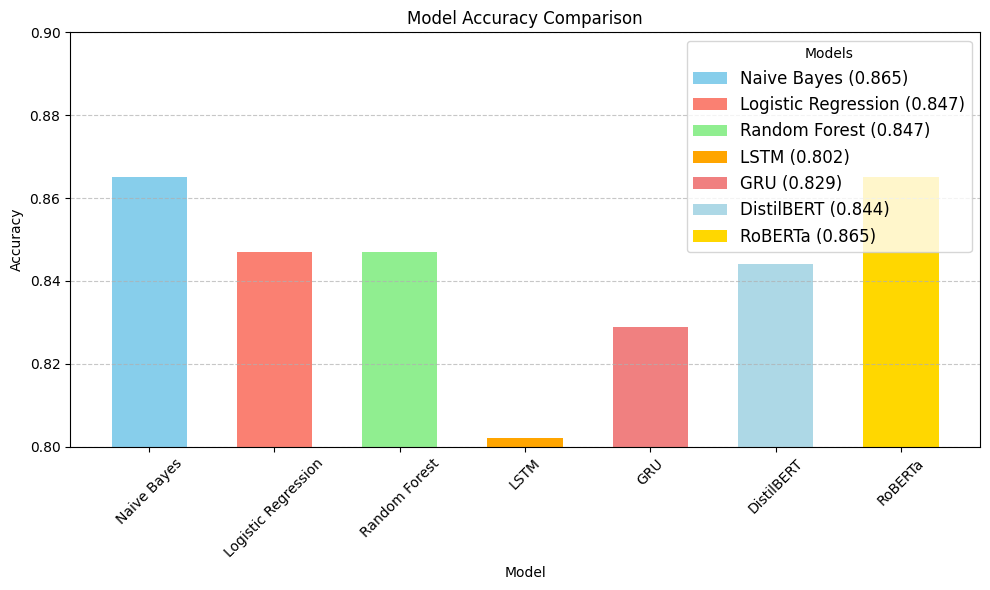

In [ ]:
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'LSTM', 'GRU', 'DistilBERT', 'RoBERTa']
accuracies = [0.865, 0.847, 0.847, 0.802, 0.829, 0.844, 0.865]  # Example accuracies

# Assigning colors to each model
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'lightblue', 'gold']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors, width=0.6)  # Adjust width as needed
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.8, 0.9)  # Adjust ylim if needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Creating legend
legend_labels = [f'{model} ({accuracy})' for model, accuracy in zip(models, accuracies)]
plt.legend(bars, legend_labels, title='Models', loc='upper right', fontsize='large')

# Display the bar graph
plt.tight_layout()
plt.show()
